In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# Read the dataset

In [2]:
df = pd.read_excel('Raisin_Dataset.xlsx')
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


### Check the classes

We have 2 classes.

In [3]:
df["Class"].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [4]:
df = df.replace("Kecimen", 0)
df = df.replace("Besni", 1)
df.head()

C:\Users\gyanr\AppData\Local\Temp\ipykernel_23404\1154617117.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("Besni", 1)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,0
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,0
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,0
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,0
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,0


In [5]:
output = df["Class"]
df = df.drop(columns=["Class"])
df

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


# Standardize the dataset

Before preparing the model, the entire dataset need to be standardized. Only train set mean and standard deviation are used to standardize the dataset to avoid potential bias. Each feature/attribute $(X_i)$ is subtracted by its mean $\mu$ and divided by its standard deviation $\sigma$. 

$\mu = \frac{1}{N} * X_i$\
$X_i = (X_i - \mu) / \sigma$

In [6]:
df.mean()

Area               87804.127778
MajorAxisLength      430.929950
MinorAxisLength      254.488133
Eccentricity           0.781542
ConvexArea         91186.090000
Extent                 0.699508
Perimeter           1165.906636
dtype: float64

In [7]:
df.std()

Area               39002.111390
MajorAxisLength      116.035121
MinorAxisLength       49.988902
Eccentricity           0.090318
ConvexArea         40769.290132
Extent                 0.053468
Perimeter            273.764315
dtype: float64

In [8]:
df_standard = (df - df.mean())/ df.std()
df_standard.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007182,0.097523,-0.023945,0.422906,-0.015700,1.106128,0.066237
1,-0.324037,-0.208896,-0.229165,0.224352,-0.304079,-0.287617,-0.161163
2,0.078249,0.097704,0.236856,0.186136,0.062079,-1.157606,0.155858
3,-1.073689,-1.244359,-0.914765,-1.069028,-1.075567,0.001711,-1.175261
4,-0.215274,-0.678581,0.726949,-2.408488,-0.238491,1.744289,-0.338450


In [9]:
df_standard = df_standard.to_numpy()
df_standard.shape

(900, 7)

# Prepare the K-means algorithm

Steps to follow:

* Initialize the centroids randomly
* Assign each sample to the nearest cluster
* Update the centroids
* Repeat steps 2-3 until convergence


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

class KMeans:
    """
    KMeans Clustering Algorithm

    Attributes
    ----------
    n_clusters : int
        Number of clusters to form.
    max_iter : int, default=100
        Maximum number of iterations of the k-means algorithm for a single run.
        
    Methods
    -------
    fit(X)
        Compute k-means clustering on the provided data.
    """
    def __init__(self, n_clusters, max_iter=300):
        """
        Parameters
        ----------
        n_clusters : int
            Number of clusters to form.
        max_iter : int, default=100
            Maximum number of iterations of the k-means algorithm for a single run.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter

    def fit(self, X):
        self.centroids = self._init_random_centroids(X)
        self.labels = None
        for i in range(self.max_iter):
            old_centroids = np.copy(self.centroids)
            self.labels = self._assign_labels(X)
            self.centroids = self._update_centroids(X)
            if np.allclose(old_centroids, self.centroids):
                break

    def _init_random_centroids(self, X):
        n_samples = X.shape[0]
        idx = np.random.choice(n_samples, self.n_clusters, replace=False)
        return X[idx]

    def _assign_labels(self, X):
        distances = self._calculate_distances(X)
        return np.argmin(distances, axis=1)

    def _calculate_distances(self, X):
        return np.sqrt(np.sum((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2, axis=2))

    def _update_centroids(self, X):
        new_centroids = np.empty((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            new_centroids[i] = X[self.labels == i].mean(axis=0)
        return new_centroids

## Elbow method

In [11]:
def elbow_method(X, max_k=10):
    """
    The elbow method for determining the optimal number of clusters (k) in KMeans clustering.
    """
    wcss = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        wcss.append(np.sum((X - kmeans.centroids[kmeans.labels]) ** 2))
    plt.plot(range(1, max_k+1), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Within-Cluster Sum of Squares')
    plt.show()

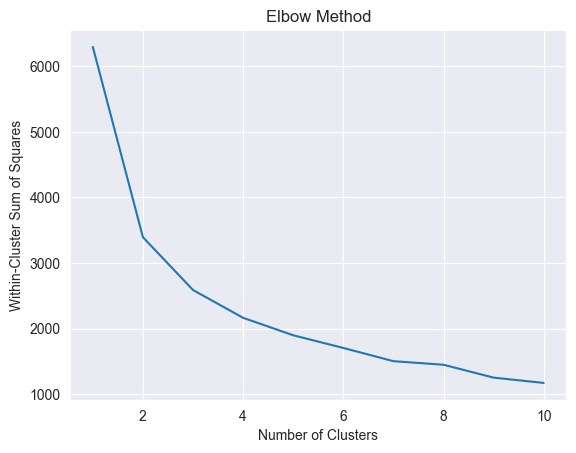

In [12]:
# Usage example
max_k = 10
elbow_method(df_standard, max_k)

# We can see the elbow for k=2 which is the number of ground truth clusters of our dataset

## Silhouette method for finding optimal K

In [13]:
def compute_silhouette(X, labels):
    """
    Compute the Silhouette Coefficient in X using given cluster labels.

    Parameters:
    -----------
    X: array-like or sparse matrix, shape (n_samples, n_features)
        Matrix of data points.
    labels: array-like, shape (n_samples,)
        Predicted labels for each sample in X.

    Returns:
    --------
    Silhouette Coefficient (scalar)
    """
    n_samples = X.shape[0]
    distances = pairwise_distances(X)

    a = np.zeros(n_samples)
    b = np.zeros(n_samples)
    for i in range(n_samples):
        # Compute the average distance between i and all other points in the same cluster
        mask = labels == labels[i]
        mask[i] = False
        a[i] = np.mean(distances[i, mask])

        # Compute the average distance between i and all points in the closest neighboring cluster
        b[i] = np.min([np.mean(distances[i, labels == j]) for j in set(labels) if j != labels[i]])

    # Compute the silhouette coefficient for each sample and then take mean for the entire dataset
    scores = np.mean((b - a) / np.maximum(a, b))
    return scores

## Plot Silhouette method

In [14]:
def silhouette_method(X, max_k=10):
    """
    The silhouette method for determining the optimal number of clusters (k) in KMeans clustering.
    """
    silhouette_scores = []
    s_scores = []
    for k in range(2, max_k+1):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(X)
        labels = kmeans.labels
        
        score = compute_silhouette(X, labels)
        silhouette_scores.append(score)
    
    plt.plot(range(2, max_k+1), silhouette_scores)
    plt.title('Silhouette Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

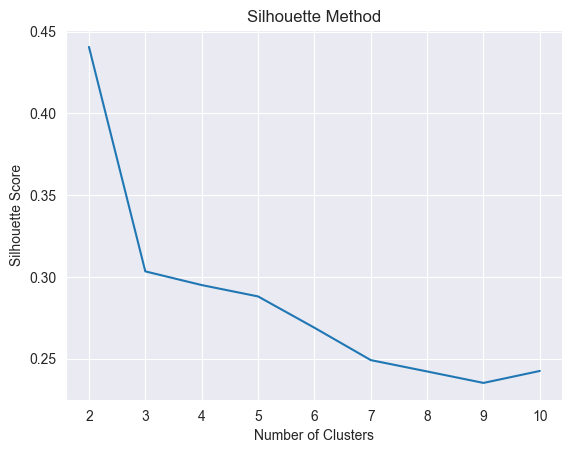

In [15]:
# Usage example
max_k = 10
silhouette_method(df_standard, max_k)

# We can see the maximum score for k=2 which is the number of ground truth clusters of our dataset